## Modelling

### Importing Libraries

In [501]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [568]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Importing Data

In [802]:
df = pd.read_csv('../assets/cleaned_data.csv')

In [804]:
df.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010,False,False,False,True,False,False
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358,False,False,False,False,False,True
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358,False,False,False,False,False,False
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080,False,True,False,False,True,False
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010,False,False,True,False,False,False


### Modelling the Data

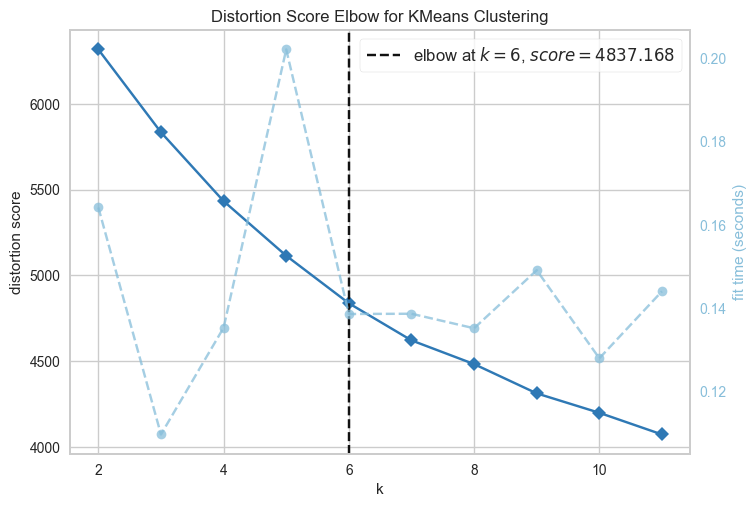

In [1040]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(df)
visualizer.poof(outpath="../assets/elbow.png")
visualizer.show();

In [824]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))

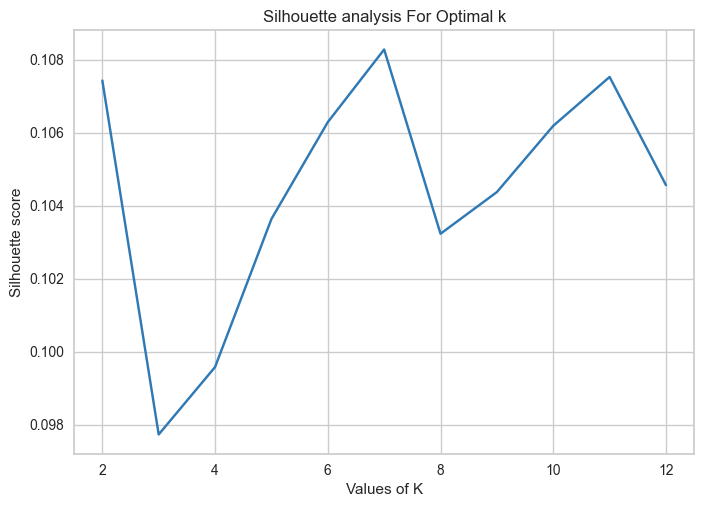

In [1038]:
aa = plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")

plt.savefig("../assets/sil.png", dpi=300, bbox_inches='tight')

plt.show()

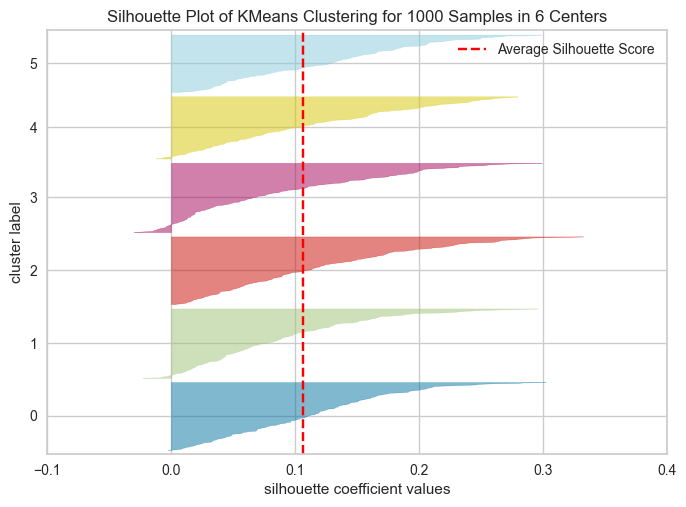

In [1044]:
km = KMeans(n_clusters=6, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df)
visualizer.poof(outpath="../assets/sil_vis.png")
visualizer.show();

In [830]:
km.fit(df)
cluster_labels = km.labels_

In [832]:
clusters = pd.DataFrame(cluster_labels)
clusters.head()

,0
0,0
1,0
2,4
3,2
4,4


In [834]:
df_seg = pd.concat([df,clusters], axis=1)
df_seg.rename(columns={0: 'cluster'}, inplace=True)
df_seg.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,cluster
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010,False,False,False,True,False,False,0
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358,False,False,False,False,False,True,0
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358,False,False,False,False,False,False,4
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080,False,True,False,False,True,False,2
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010,False,False,True,False,False,False,4


### Visulisation Using PCA

In [841]:
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_seg.drop('cluster',axis=1))

In [843]:
df_seg['PCA1'] = pca_components[:,0]
df_seg['PCA2'] = pca_components[:,1]

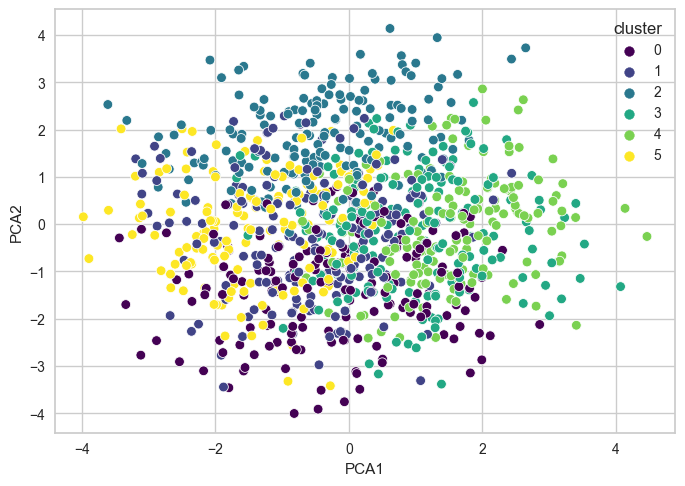

In [1052]:
aa = sns.scatterplot(data=df_seg, x='PCA1', y='PCA2', hue='cluster', palette='viridis');

In [1048]:
aa.figure.savefig("../assets/pca_clusters.png", dpi=300, bbox_inches='tight')

### Cluster Analysis

In [847]:
scaler = joblib.load('../assets/scaler.gz')

In [849]:
df_seg[['age','income','spending_score','purchase_frequency','last_purchase_amount','membership_years']] = scaler.inverse_transform(df_seg[['Scaledage','Scaledincome','Scaledspending_score','Scaledpurchase_frequency','Scaledlast_purchase_amount','Scaledmembership_years']]) 

In [851]:
df_seg.drop(['Scaledage','Scaledincome','Scaledspending_score','Scaledpurchase_frequency','Scaledlast_purchase_amount','Scaledmembership_years'], inplace=True, axis=1)
df_seg.head()

,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,cluster,PCA1,PCA2,age,income,spending_score,purchase_frequency,last_purchase_amount,membership_years
0,False,False,False,True,False,False,0,1.204473,-1.455956,38.0,99342.0,90.0,24.0,113.53,3.0
1,False,False,False,False,False,True,0,0.417582,-2.581506,21.0,78852.0,60.0,42.0,41.93,2.0
2,False,False,False,False,False,False,4,1.950017,0.521872,60.0,126573.0,30.0,28.0,424.36,2.0
3,False,True,False,False,True,False,2,-1.265265,2.098595,40.0,47099.0,74.0,5.0,991.93,9.0
4,False,False,True,False,False,False,4,2.199532,0.337948,65.0,140621.0,21.0,25.0,347.08,3.0


In [853]:
def reconstruct(row, encoded, dropped, original):
    cat_name = original+'_'
    for col in encoded:
        if row[col] == 1:
            return col.replace(cat_name, '')
    return dropped

In [855]:
def reconstruct_category(data_frame, encoded, original, dropped):
    data_frame[original] = data_frame.apply(reconstruct, axis=1, args=(encoded, dropped, original))
    data_frame = data_frame.drop(columns = encoded)
    return data_frame

In [857]:
df_seg = reconstruct_category(df_seg, ['gender_Male', 'gender_Other'], 'gender', 'Female')

In [859]:
df_seg = reconstruct_category(df_seg, ['preferred_category_Electronics', 'preferred_category_Groceries', 'preferred_category_Home & Garden', 'preferred_category_Sports'], 'preferred_category', 'Clothing')

In [861]:
df_seg.head(10)

,cluster,PCA1,PCA2,age,income,spending_score,purchase_frequency,last_purchase_amount,membership_years,gender,preferred_category
0,0,1.204473,-1.455956,38.0,99342.0,90.0,24.0,113.53,3.0,Female,Groceries
1,0,0.417582,-2.581506,21.0,78852.0,60.0,42.0,41.93,2.0,Female,Sports
2,4,1.950017,0.521872,60.0,126573.0,30.0,28.0,424.36,2.0,Female,Clothing
3,2,-1.265265,2.098595,40.0,47099.0,74.0,5.0,991.93,9.0,Other,Home & Garden
4,4,2.199532,0.337948,65.0,140621.0,21.0,25.0,347.08,3.0,Female,Electronics
5,1,0.783456,-1.225113,31.0,57305.0,24.0,30.0,86.85,3.0,Other,Home & Garden
6,0,-1.220347,-2.142137,19.0,54319.0,68.0,43.0,191.72,5.0,Other,Clothing
7,5,-1.510537,-0.093535,43.0,108115.0,94.0,27.0,734.56,9.0,Male,Groceries
8,2,-0.245989,3.101659,53.0,34424.0,29.0,7.0,951.71,6.0,Male,Sports
9,2,-0.116739,2.639965,55.0,45839.0,55.0,2.0,821.18,7.0,Female,Electronics


In [863]:
df_seg.groupby(['cluster'])['age'].mean()

cluster
0    32.802326
1    46.193182
2    54.069767
3    29.920455
4    56.500000
5    44.643836
Name: age, dtype: float64

In [865]:
cluster_summary = df_seg.groupby('cluster').agg({
    'age': ['min','mean','max'],
    'income': ['min','mean','max'],
    'spending_score': ['min','mean','max'],
    'purchase_frequency': ['min','mean','max'],
    'last_purchase_amount': ['min','mean','max']
})

In [867]:
cluster_summary

age                    income                           \
          min       mean   max      min           mean       max   
cluster                                                            
0        18.0  32.802326  68.0  30074.0   77991.680233  148451.0   
1        19.0  46.193182  69.0  30121.0   68704.107955  143338.0   
2        19.0  54.069767  69.0  30004.0   58867.930233  116123.0   
3        18.0  29.920455  63.0  30102.0   99447.289773  149973.0   
4        33.0  56.500000  69.0  49725.0  122383.170886  149936.0   
5        18.0  44.643836  69.0  38683.0  109792.876712  149723.0   

        spending_score                   purchase_frequency                   \
                   min       mean    max                min       mean   max   
cluster                                                                        
0                 28.0  76.424419  100.0                1.0  26.081395  50.0   
1                  1.0  22.982955   75.0                1.0  27.232955  50.0   
2                  3.0  60.302326  100.0                1.0  27.313953  50.0   
3                  1.0  32.585227   96.0                1.0  23.528409  50.0   
4                  3.0  52.765823  100.0                1.0  22.310127  50.0   
5                  2.0  61.993151  100.0                5.0  33.924658  50.0   

        last_purchase_amount                      
                         min        mean     max  
cluster                                           
0                      13.16  234.314360  889.83  
1                      12.45  336.655852  971.09  
2                     197.29  742.928314  998.09  
3                      34.10  630.369489  998.51  
4                      10.40  314.133165  949.32  
5                      83.27  715.297466  999.74

In [869]:
cluster_distribution = df_seg['cluster'].value_counts()
print(cluster_distribution)

cluster
1    176
3    176
0    172
2    172
4    158
5    146
Name: count, dtype: int64


In [871]:
pref_category_summary = df_seg.groupby(['cluster', 'preferred_category']).size().unstack(fill_value=0)
pref_category_summary

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
cluster,,,,,
0,32,38,32,37,33
1,35,36,34,29,42
2,31,31,34,37,39
3,24,45,32,44,31
4,29,33,30,31,35
5,19,32,37,28,30


In [873]:
pref_category_proportions = pref_category_summary.div(pref_category_summary.sum(axis=1), axis=0)
pref_category_proportions

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
cluster,,,,,
0,0.186047,0.220930,0.186047,0.215116,0.191860
1,0.198864,0.204545,0.193182,0.164773,0.238636
2,0.180233,0.180233,0.197674,0.215116,0.226744
3,0.136364,0.255682,0.181818,0.250000,0.176136
4,0.183544,0.208861,0.189873,0.196203,0.221519
5,0.130137,0.219178,0.253425,0.191781,0.205479


In [875]:
gen_category_summary = df_seg.groupby(['cluster', 'gender']).size().unstack(fill_value=0)
gen_category_summary

gender,Female,Male,Other
cluster,,,
0,75,64,33
1,51,69,56
2,43,53,76
3,49,70,57
4,52,57,49
5,46,44,56


In [877]:
gen_category_proportions = gen_category_summary.div(gen_category_summary.sum(axis=1), axis=0)
gen_category_proportions

gender,Female,Male,Other
cluster,,,
0,0.436047,0.372093,0.191860
1,0.289773,0.392045,0.318182
2,0.250000,0.308140,0.441860
3,0.278409,0.397727,0.323864
4,0.329114,0.360759,0.310127
5,0.315068,0.301370,0.383562


#### Visualising Cluster Data

In [882]:
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
custom_palette = sns.color_palette('RdBu_r', n_colors=10)

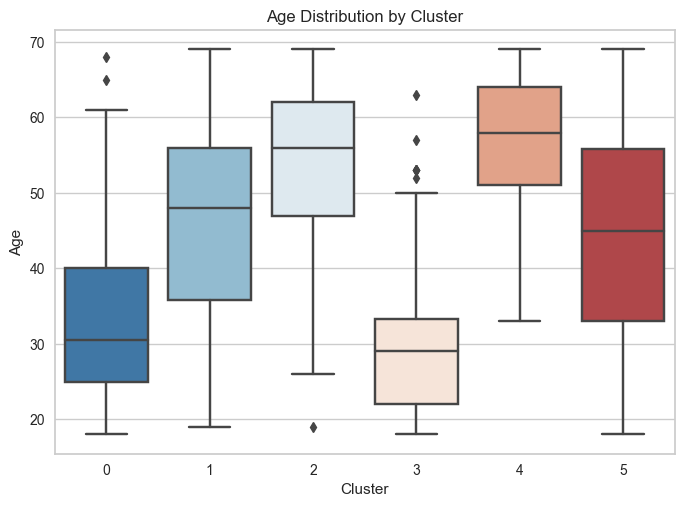

In [960]:
a = sns.boxplot(data=df_seg, x='cluster', y='age')
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster');

In [962]:
a.figure.savefig("../assets/age_dist.png", dpi=300, bbox_inches='tight')

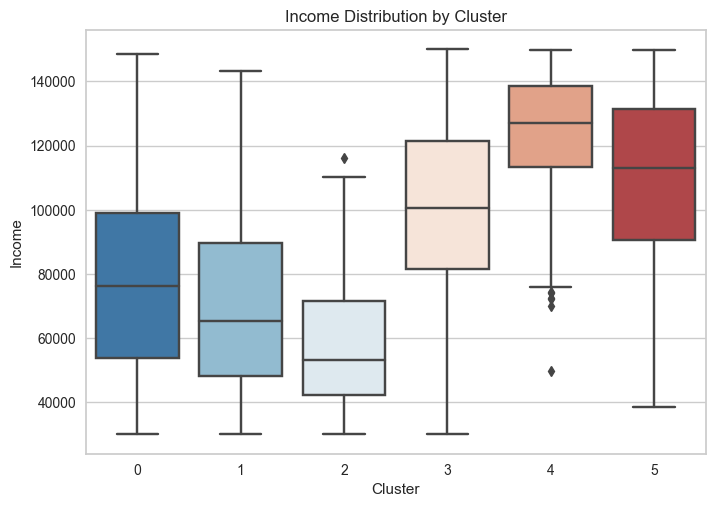

In [964]:
b = sns.boxplot(data=df_seg, x='cluster', y='income')
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster');

In [966]:
b.figure.savefig("../assets/income_dist.png", dpi=300, bbox_inches='tight')

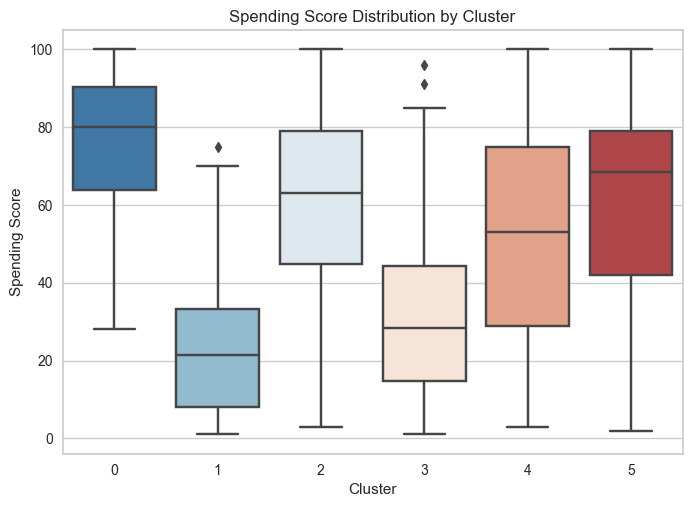

In [968]:
c = sns.boxplot(data=df_seg, x='cluster', y='spending_score')
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster');

In [970]:
c.figure.savefig("../assets/spend_score_dist.png", dpi=300, bbox_inches='tight')

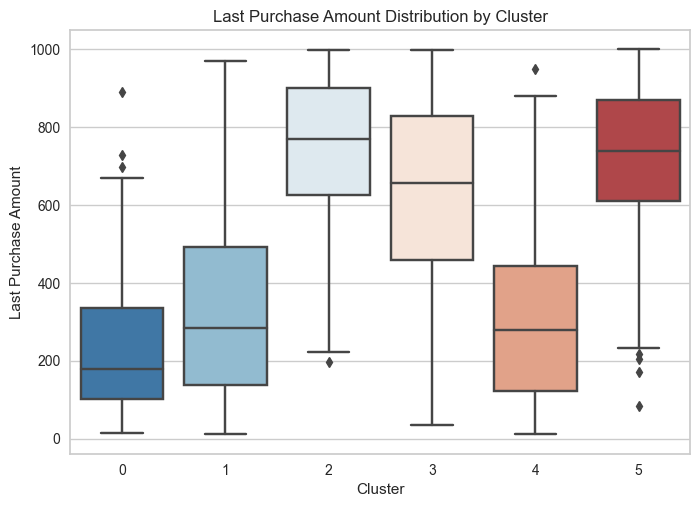

In [1060]:
d = sns.boxplot(data=df_seg, x='cluster', y='last_purchase_amount')
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster');

In [1062]:
d.figure.savefig("../assets/last_pur_amnt.png", dpi=300, bbox_inches='tight')

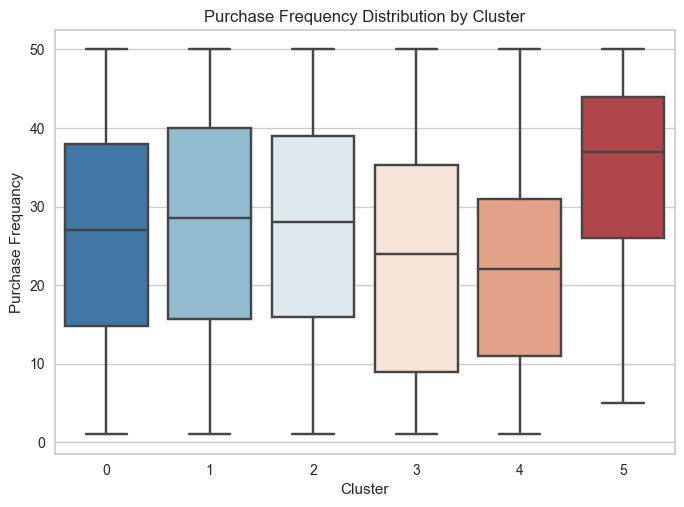

In [976]:
e = sns.boxplot(data=df_seg, x='cluster', y='purchase_frequency')
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster');

In [978]:
e.figure.savefig("../assets/p_freq.png", dpi=300, bbox_inches='tight')

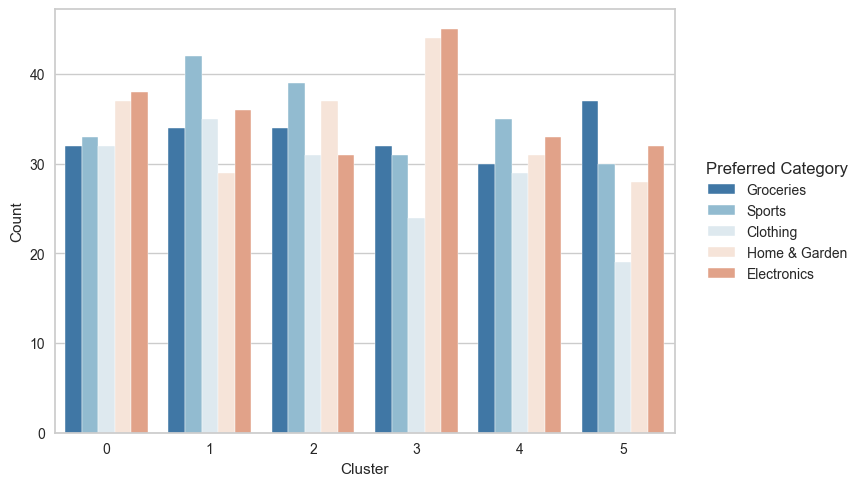

In [980]:
f = sns.countplot(data=df_seg, hue='preferred_category', x='cluster')
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.3, 0.5));

In [982]:
f.figure.savefig("../assets/pref_cat.png", dpi=300, bbox_inches='tight')

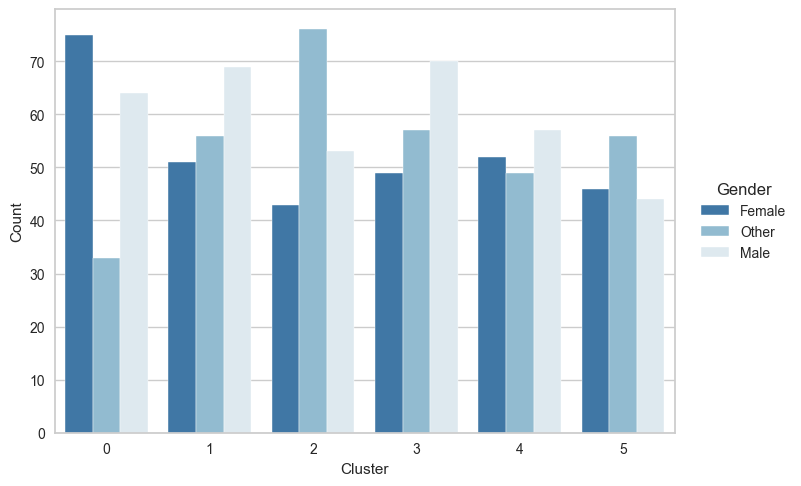

In [984]:
g = sns.countplot(data=df_seg, hue='gender', x='cluster')
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5));

In [986]:
g.figure.savefig("../assets/gender.png", dpi=300, bbox_inches='tight')

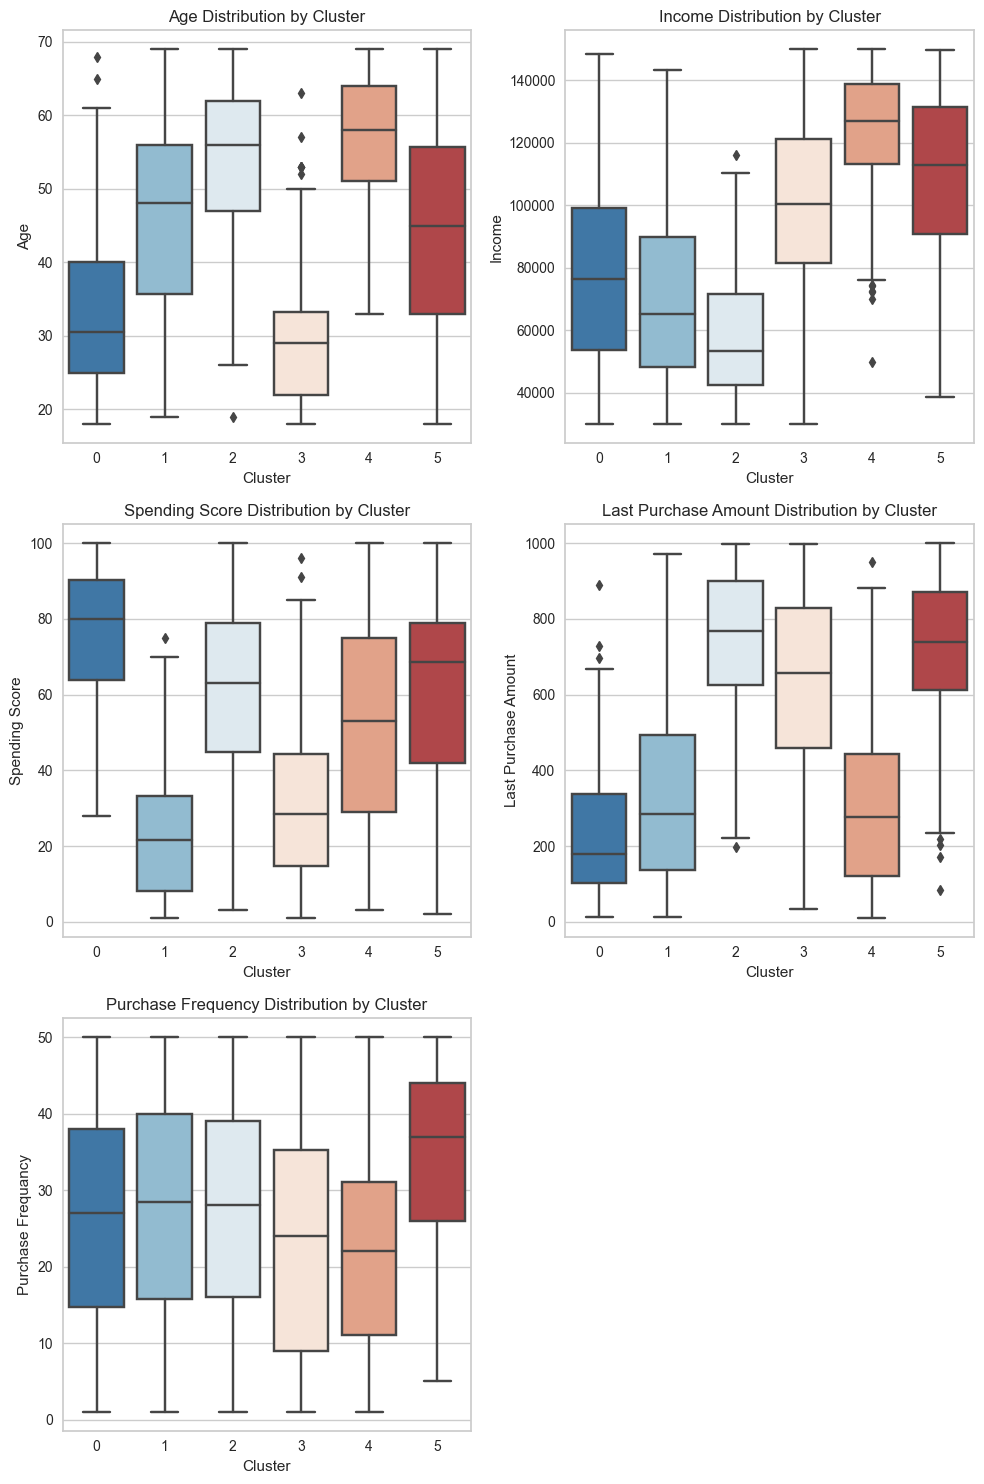

In [1054]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten() 

a = sns.boxplot(data=df_seg, x='cluster', y='age', ax=axes[0])
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster')
b = sns.boxplot(data=df_seg, x='cluster', y='income', ax=axes[1])
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster')
c = sns.boxplot(data=df_seg, x='cluster', y='spending_score', ax=axes[2])
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster')
d = sns.boxplot(data=df_seg, x='cluster', y='last_purchase_amount', ax=axes[3])
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster')
e = sns.boxplot(data=df_seg, x='cluster', y='purchase_frequency', ax=axes[4])
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [1056]:
fig.savefig("../assets/cluster_cont.png", dpi=300, bbox_inches='tight')

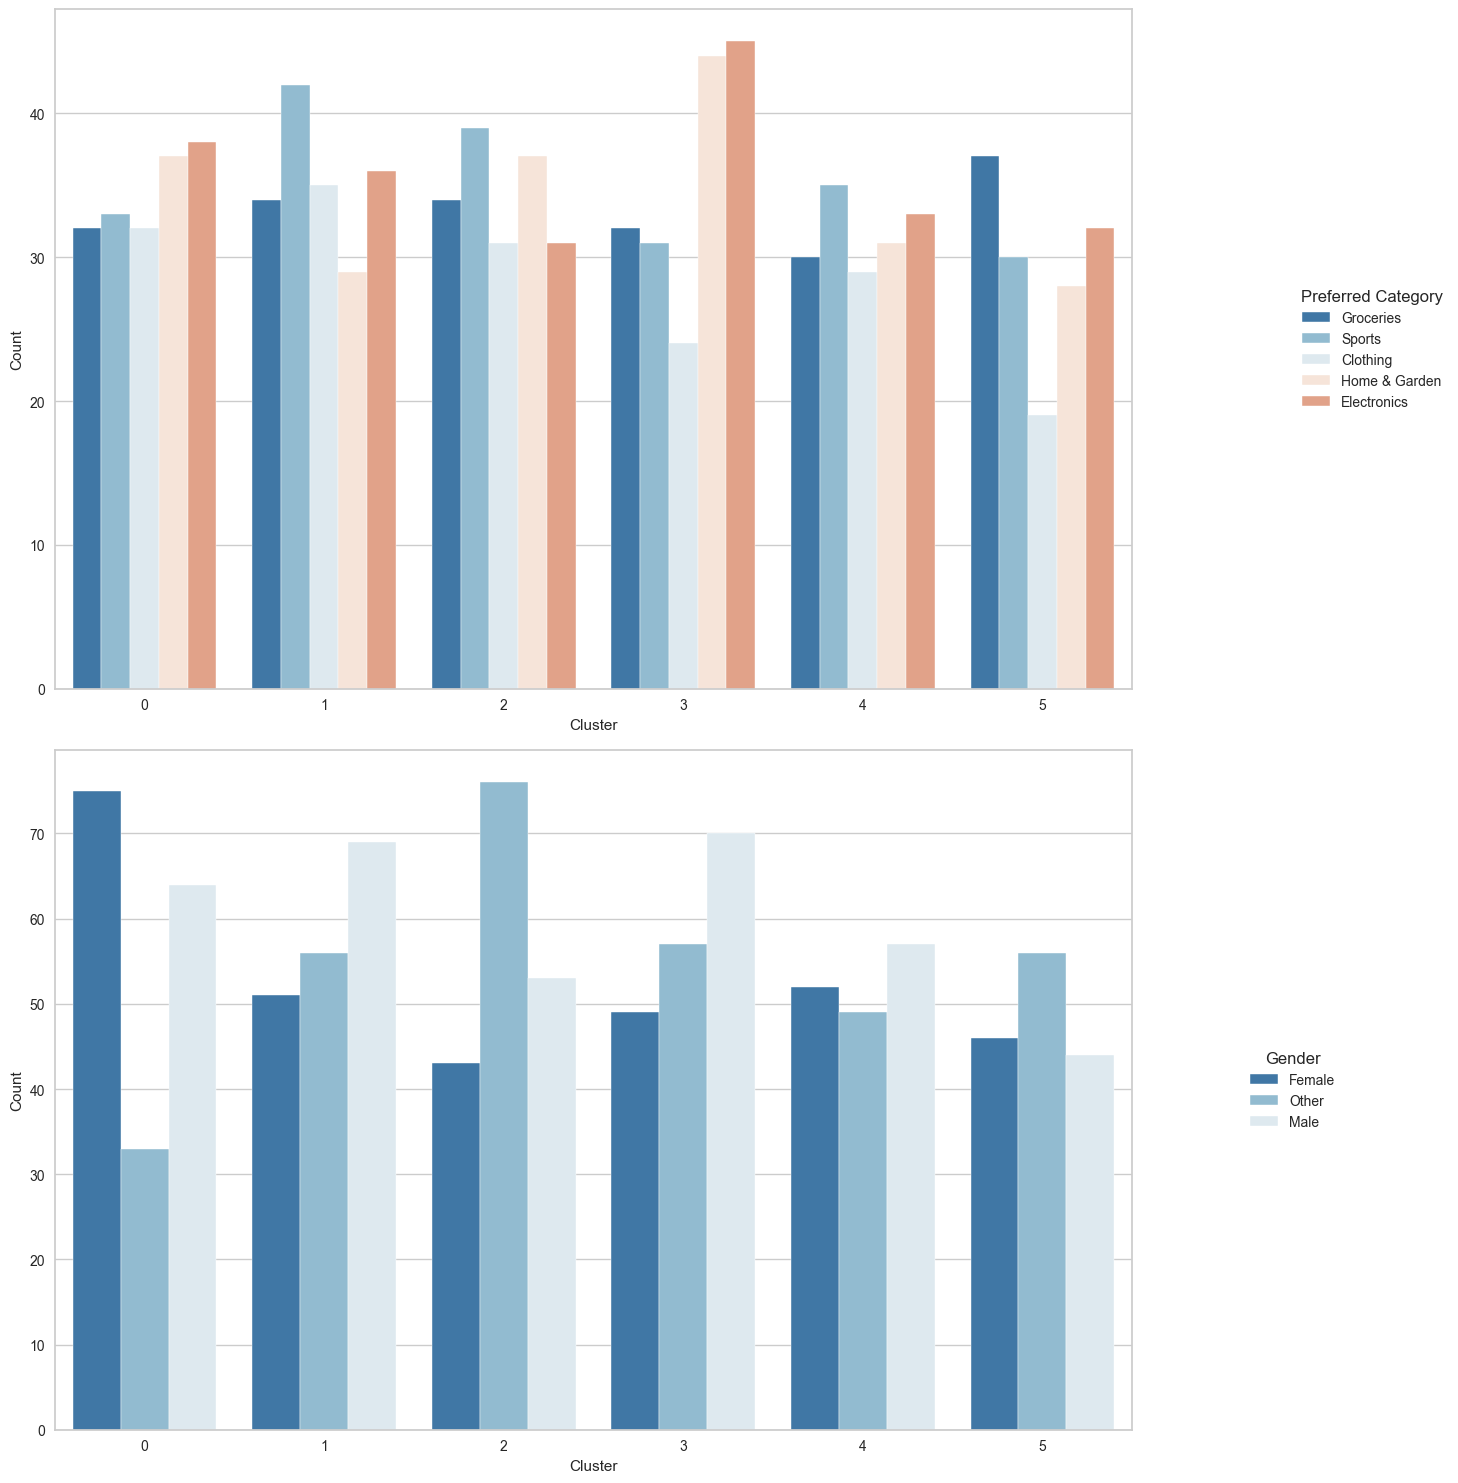

In [948]:
fig1, axes1 = plt.subplots(2, 1, figsize=(15, 15))
axes1 = axes1.flatten() 

f = sns.countplot(data=df_seg, hue='preferred_category', x='cluster', ax=axes1[0])
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.3, 0.5))
g = sns.countplot(data=df_seg, hue='gender', x='cluster', ax=axes1[1])
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()

In [950]:
fig1.savefig('../assets/cluster_cat_breakdown.png', dpi=300, bbox_inches='tight')

### Brief Clustering Analysis Without Categorical Variables

In [1065]:
df2 = pd.read_csv('../assets/cleaned_data.csv')

In [1069]:
df2.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010,False,False,False,True,False,False
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358,False,False,False,False,False,True
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358,False,False,False,False,False,False
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080,False,True,False,False,True,False
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010,False,False,True,False,False,False


In [1071]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Scaledage                         1000 non-null   float64
 1   Scaledincome                      1000 non-null   float64
 2   Scaledspending_score              1000 non-null   float64
 3   Scaledpurchase_frequency          1000 non-null   float64
 4   Scaledlast_purchase_amount        1000 non-null   float64
 5   Scaledmembership_years            1000 non-null   float64
 6   gender_Male                       1000 non-null   bool   
 7   gender_Other                      1000 non-null   bool   
 8   preferred_category_Electronics    1000 non-null   bool   
 9   preferred_category_Groceries      1000 non-null   bool   
 10  preferred_category_Home & Garden  1000 non-null   bool   
 11  preferred_category_Sports         1000 non-null   bool   
dtypes: bool

In [1083]:
df2.drop(columns=df2.select_dtypes(include='bool').columns, axis=1, inplace=True)

In [1085]:
df2.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010


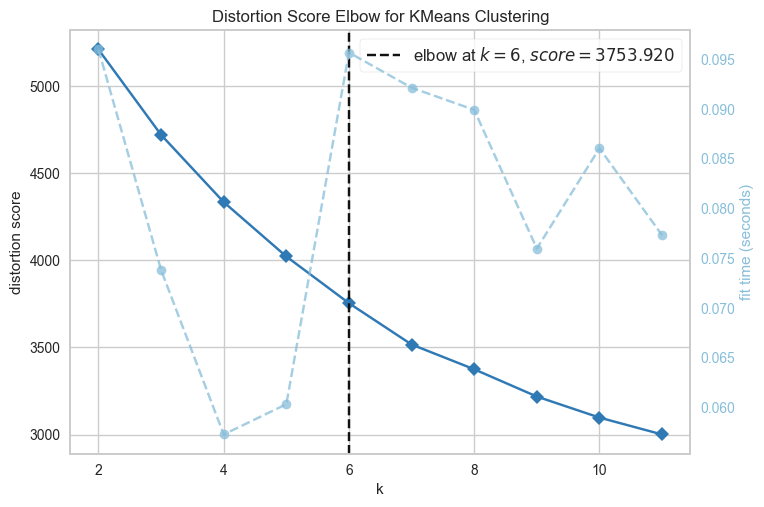

In [1087]:
km2 = KMeans(random_state=42)
visualizer2 = KElbowVisualizer(km2, k=(2,12))
 
visualizer2.fit(df2)
visualizer2.show();

In [1089]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
silhouette_avg2 = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans2 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans2.fit(df2)
    cluster_labels2 = kmeans2.labels_

    # silhouette score
    silhouette_avg2.append(silhouette_score(df2, cluster_labels2))

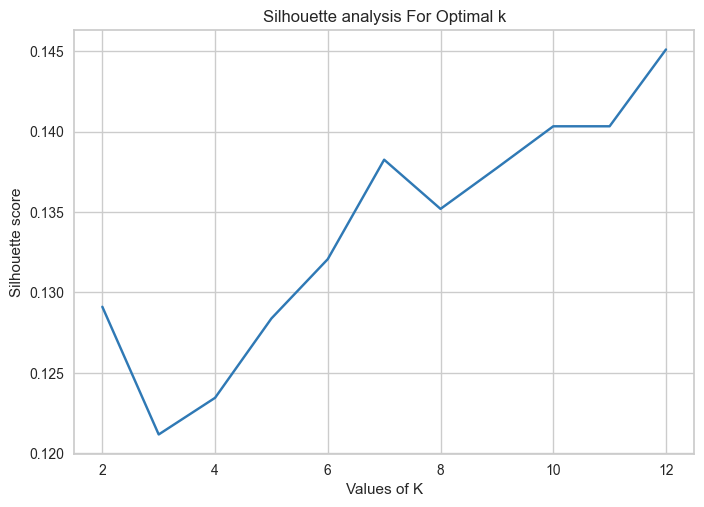

In [1091]:
plt.plot(range_n_clusters, silhouette_avg2)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")

plt.show()

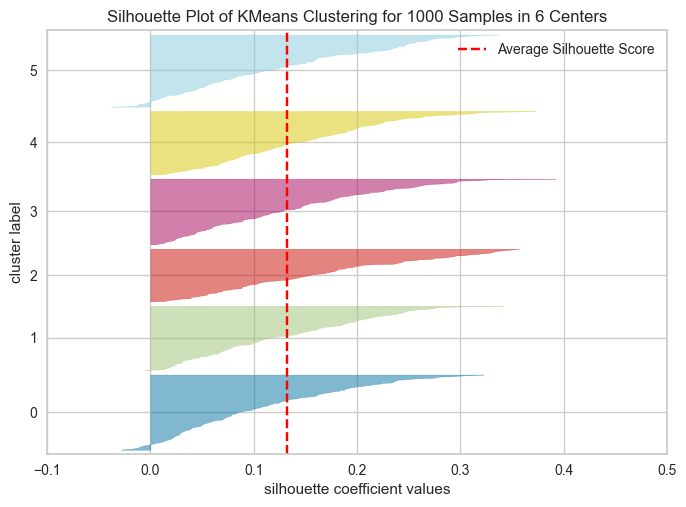

In [1093]:
km2 = KMeans(n_clusters=6, random_state=42)
visualizer2 = SilhouetteVisualizer(km2, colors='yellowbrick')
visualizer2.fit(df2)
visualizer2.show();

In [1095]:
km2.fit(df2)
cluster_labels2 = km2.labels_

In [1097]:
clusters2 = pd.DataFrame(cluster_labels2)
clusters2.head()

,0
0,1
1,1
2,4
3,5
4,4


In [1099]:
df2_seg = pd.concat([df2,clusters2], axis=1)
df2_seg.rename(columns={0: 'cluster'}, inplace=True)
df2_seg.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years,cluster
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010,1
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358,1
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358,4
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080,5
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010,4


In [1101]:
pca2 = PCA(n_components=2, random_state=42)
pca_components2 = pca2.fit_transform(df2_seg.drop('cluster',axis=1))

In [1103]:
df2_seg['PCA1'] = pca_components2[:,0]
df2_seg['PCA2'] = pca_components2[:,1]

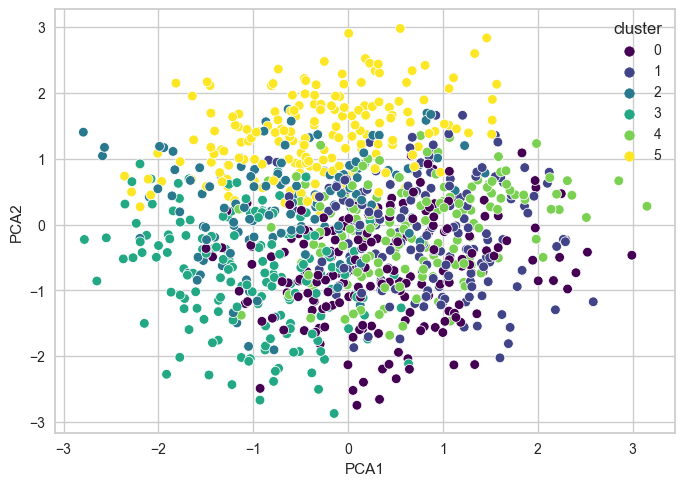

In [1105]:
sns.scatterplot(data=df2_seg, x='PCA1', y='PCA2', hue='cluster', palette='viridis');